<div align=right> 
Winter 2025<br>
Nardin<br>
HW6<br>
Yolanda Pan<br>
</div>

<font color='darkblue'> <h2 align=center>Homework 6: Data Visualization in Python</h2> </font>


### Instructions

In class, we explored different ways to visualize data using Python. The goal of this homework is to strengthen your data visualization skills by creating **two visualizations** as follows:

* **Create each visualization using any of the Python viz libraries we saw in class.** You can use the same library for both visualizations or a different one for each.

* **You can either use the data your group collected from your final project or your own data.** If you choose the first (final project data), you can re-use the viz for the final project submission, if you wish to do so. If you choose the latter (your own data), it must be something you have personally collected for another class, your own research, etc., rather than built-in datasets or data already used in visualization tutorials, as those won't qualify.

* **Your visualizations must follow the principles of good data viz we discussed in class.** For instance, they must have a proper title, proper axes labels and scale, legend, ensure the graph appropriately matches the variables used, etc. See the slides for more details.

* **At least one of your two visualizations should go beyond the basics**. Consider examples from class, such as the "sentiment toward COVID" viz from the slides and the "presidential election prediction" viz from the notebook, as baseline references. You might need to, and are encouraged to, perform data wrangling (reshaping, aggregating data, etc.) before plotting.

* **Explain each visualization in a few sentences.** Describe what the visualization shows and how the reader should interpret it (e.g. the main point you want to make with your visualization). Finally, explain why your visualization is a good choice for your purpose and what can be further improved. 


Please remember: 
* Submit on Gradescope your Jupyter notebook with the homework completed and the output of your code visible. Ensure the file is not too large for Gradescope. Do not submit the data, we only need the notebook.
* HWs must be completed individually and are graded on a Pass-Fail basis. Before submitting, see the Syllabus for homework policies (what qualifies as a "Pass", deadlines, regrading, etc.)
* At the end of the notebook include the resources you consulted, and some reflections on what you learned. **Submissions without resources and reflections will automatically be graded as "Fail"**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns          

In [3]:
plt.rcParams["figure.figsize"] = [5, 5]

In [4]:
df = pd.read_csv("final_data_for_sentiment_analysis_v2.csv")
df.head()

,Date,Text,sentiment_score
0,2024-11-25,ABSOLUTELY a SCAM I am at the doctor s of...,-1.0
1,2024-11-23,It s not special I promise you,-99.0
2,2024-11-22,I noticed Forward is currently hiring on Linke...,-99.0
3,2024-12-08,Yes gross taxable pretax investments lower gr...,-99.0
4,2024-12-17,Regardless this isn t a sign of a bad company...,-99.0


### Visualization 1

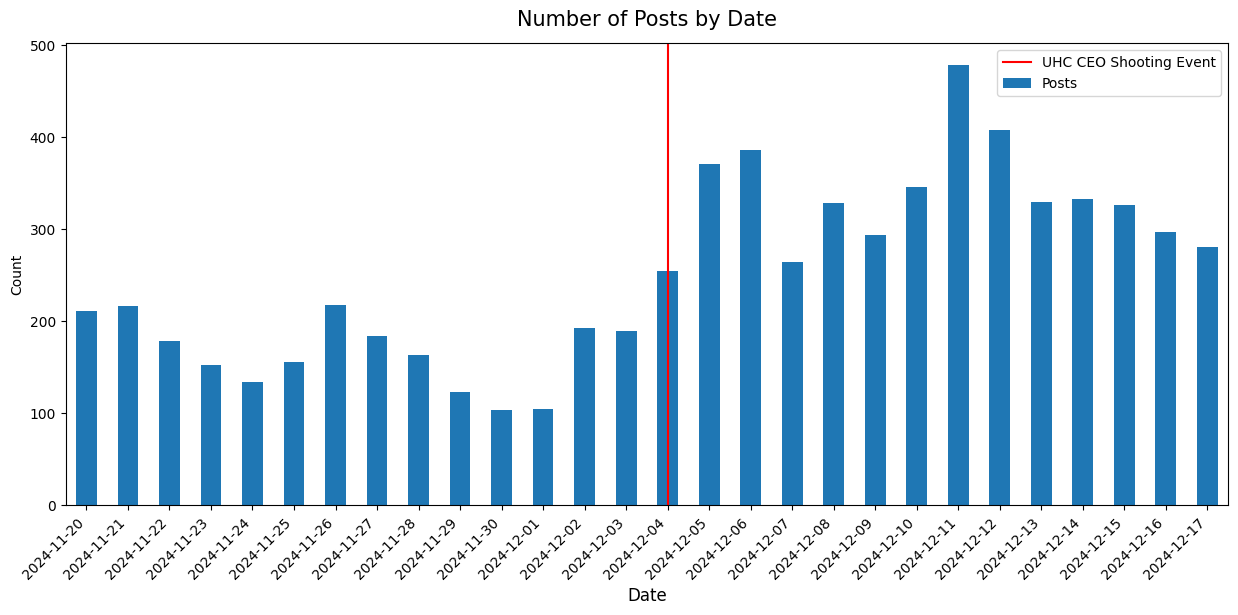

In [46]:
# pandas + matplotlib
df.groupby('Date').count().plot(
    y='Text',
    kind='bar',
    xlabel='Date',
    ylabel='Count',
    figsize = (15,6)
)

plt.title('Number of Posts by Date',
          size = 15,
          y = 1.02)
plt.xlabel('Date', size = 12)
plt.xticks(rotation=45, ha='right');
# add line at 2024-12-04
plt.axvline(x = 14, color = 'r', label = 'UHC CEO Shooting Event')
plt.legend(['UHC CEO Shooting Event','Posts'], fontsize = 10);

This graph shows the daily number of posts over time, spanning from November 20 to December 17, 2024. A red vertical line marks December 4, 2024, indicating the UHC CEO Shooting Event. The peak occurred around December 10-11, reaching nearly 500 posts. This pattern suggests the shooting event triggered increased social media activity and discussion about UHC.

### Visualization 2

In [5]:
def categorize_sentiment(score):
    if score == -99:
        return 'Irrelevant'
    elif score == 1:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    elif score == -1:
        return 'Negative'
    else:
        return 'Other'

In [6]:
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

In [7]:
df.head()

,Date,Text,sentiment_score,sentiment_category
0,2024-11-25,ABSOLUTELY a SCAM I am at the doctor s of...,-1.0,Negative
1,2024-11-23,It s not special I promise you,-99.0,Irrelevant
2,2024-11-22,I noticed Forward is currently hiring on Linke...,-99.0,Irrelevant
3,2024-12-08,Yes gross taxable pretax investments lower gr...,-99.0,Irrelevant
4,2024-12-17,Regardless this isn t a sign of a bad company...,-99.0,Irrelevant


In [41]:
df_grouped = df.groupby(['Date', 'sentiment_category']).count().reset_index()
df_grouped

,Date,sentiment_category,Text,sentiment_score
0,2024-11-20,Irrelevant,67,67
1,2024-11-20,Negative,18,18
2,2024-11-20,Neutral,125,125
3,2024-11-20,Positive,1,1
4,2024-11-21,Irrelevant,70,70
...,...,...,...,...
97,2024-12-16,Negative,40,40
98,2024-12-16,Neutral,152,152
99,2024-12-17,Irrelevant,93,93
100,2024-12-17,Negative,30,30


In [49]:
df_plot = df_grouped[df_grouped['sentiment_category'] != 'Irrelevant']
df_plot.head()

,Date,sentiment_category,Text,sentiment_score
1,2024-11-20,Negative,18,18
2,2024-11-20,Neutral,125,125
3,2024-11-20,Positive,1,1
5,2024-11-21,Negative,27,27
6,2024-11-21,Neutral,116,116


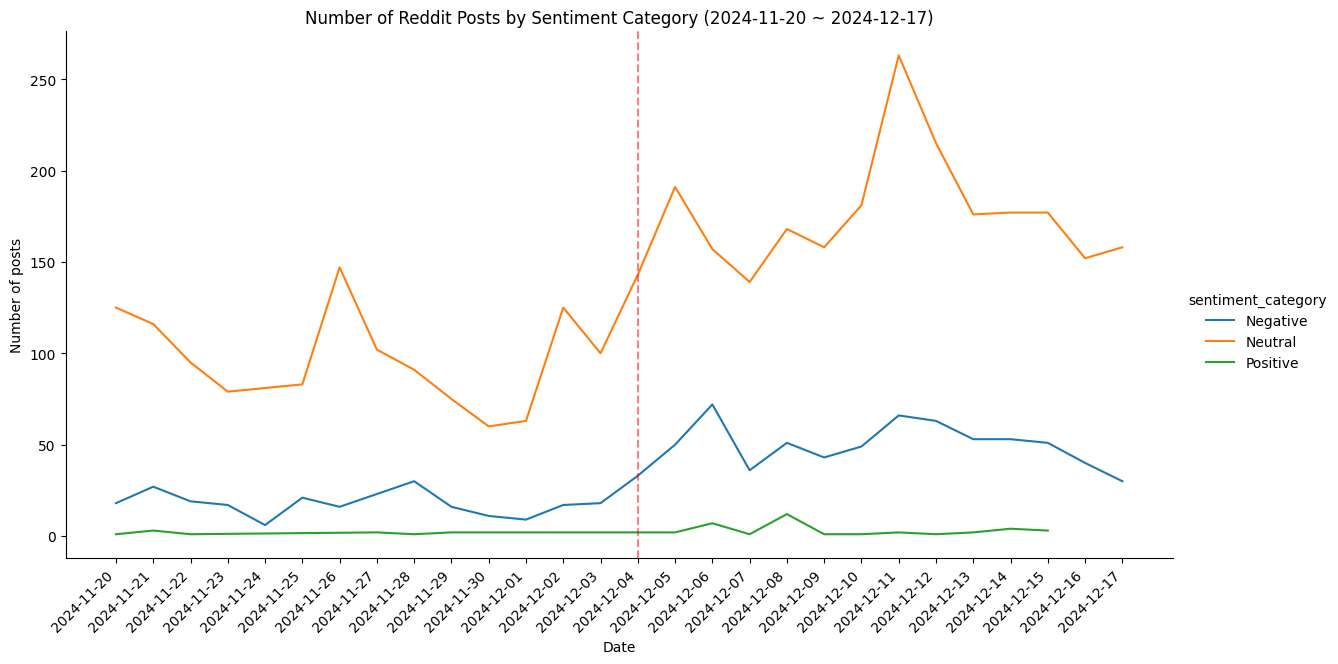

In [84]:
# then plot (seaborn for graph + matplolib for labels)

sns.relplot(data=df_plot, x='Date', y='sentiment_score', hue='sentiment_category', kind='line', height = 6, aspect=2, markers = 'o')

plt.title("Number of Reddit Posts by Sentiment Category (2024-11-20 ~ 2024-12-17)")
plt.ylabel('Number of posts', size = 10)
plt.xlabel('Date', size = 10);
plt.xticks(rotation=45, ha='right');
plt.axvline(x='2024-12-04', color='red', linestyle='--', alpha=0.5, 
            label='UHC CEO Shooting Event')

The graph illustrates the absolute number of Reddit posts over time, revealing distinct patterns in sentiment distribution. The most striking feature is the dominance of neutral sentiment posts, shown by the orange line that fluctuates between 60 and 250 posts daily. A significant surge in activity occurs after the UHC CEO Shooting Event on December 4th, marked by a red dashed line, where neutral posts reach their peak at approximately 250 daily posts. Negative sentiment posts, represented by the blue line, maintain a moderate presence throughout the period, ranging from 20 to 70 posts per day, while positive sentiment posts, shown in green, consistently remain at minimal levels, rarely exceeding 10 posts daily. This visualization effectively captures the raw volume of discussion and its dramatic increase following the key event.

In [77]:
df_pct = df_plot.groupby(['Date', 'sentiment_category'])['Text'].first().unstack(fill_value=0)
df_pct = df_pct.div(df_pct.sum(axis=1), axis=0) * 100
df_pct.head()

sentiment_category,Negative,Neutral,Positive
Date,,,
2024-11-20,12.500000,86.805556,0.694444
2024-11-21,18.493151,79.452055,2.054795
2024-11-22,16.521739,82.608696,0.869565
2024-11-23,17.708333,82.291667,0.000000
2024-11-24,6.896552,93.103448,0.000000


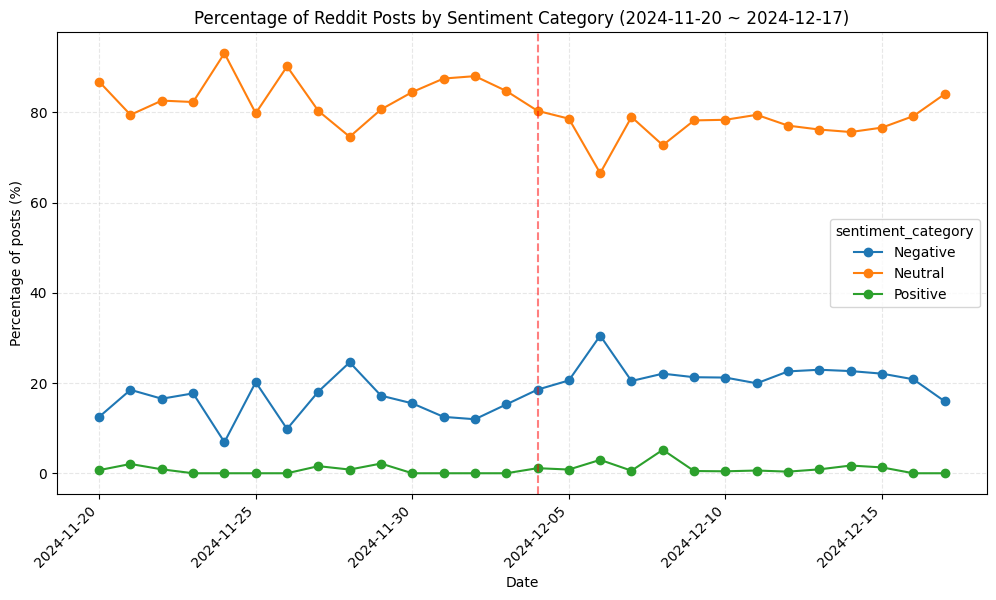

In [82]:
ax = df_pct.plot(
    kind='line',
    figsize=(12, 6),
    marker='o'
)

plt.title("Percentage of Reddit Posts by Sentiment Category (2024-11-20 ~ 2024-12-17)")
plt.ylabel('Percentage of posts (%)', size=10)
plt.xlabel('Date', size=10)
plt.xticks(rotation=45, ha='right')
plt.axvline(x=14, color='red', linestyle='--', alpha=0.5, 
            label='UHC CEO Shooting Event')

plt.grid(True, linestyle='--', alpha=0.3)


The graph, displaying the percentage distribution of sentiments, tells a somewhat different story about the same data. While the absolute numbers varied significantly, the proportional relationship between different sentiments remained relatively stable throughout the period. Neutral sentiment consistently dominated the conversation, accounting for approximately 75-85% of daily posts, while negative sentiment typically constituted 10-25% of the daily discussion. Positive sentiment maintained a minimal presence in the overall conversation, rarely exceeding 5% of daily posts.

 Interestingly, even after the December 4th event, while the total volume of posts increased substantially, the relative distribution of sentiments remained largely unchanged, suggesting that the event intensified discussion without fundamentally altering the balance of sentiment in the conversation.

### Reflections and Resources

Modify this Markdown cell to include a few sentences about what you learned from this exercise and cite all resources you used and provide links to them. Thanks!

My visualization task used a cleaned dataset of Reddit posts and each sentiment category about UHC during a specific timeframe. 

Visual 1:   
- Simple groupby on 'Date' to get total counts
- Used standard bar plot to show volume over time
- Added vertical line marker using plt.axvline() for the event
- Key functions: groupby(), count(), plt.bar()


Visual2: 
- Raw Amount
    - Filtered out 'Irrelevant' category first
    - Used groupby on both 'Date' and 'sentiment_category'
    - Applied unstack() to reshape data for plotting
    - Used sns.relplot() with kind='line' for time series
    - Added markers=True for data point visibility
    - Key functions: groupby(), size(), unstack(), sns.relplot()
- Frequency (percentage)
    - Started with same grouped data as Visual 2-1
    - Used div() and multiplication to convert to percentages
    - Added grid lines for better readability of values
    - Customized y-axis to show percentage scale
    - Key functions: div(), sum(axis=1), plt.grid()
    - Used same vertical line marker technique but with adjusted alpha for visibility
